In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("D:\Mafia\Week 2 Assignment(Lenear and Logistic Regression)\Linear Regression\Assignment 1\Training Data\Linear_X_Train.csv")
dfy = pd.read_csv("D:\Mafia\Week 2 Assignment(Lenear and Logistic Regression)\Linear Regression\Assignment 1\Training Data\Linear_Y_Train.csv")

x = dfx.values
y = dfy.values

x = x.reshape((-1,1))
y = y.reshape((-1,1))
print(x.shape)
print(y.shape)

X = (x-x.mean())/x.std()
Y = y

(3750, 1)
(3750, 1)


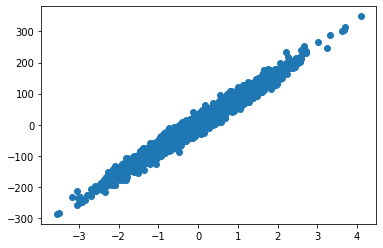

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
def hypothesis(x, theta):
    return theta[0]+theta[1]*x


In [5]:
def error(x, y, theta):
    m=x.shape[0]
    e=0
    for i in range(m):
        hx=hypothesis(x[i], theta)
        e+=(hx-y[i])**2
    return e

In [6]:
def gradient(x, y, theta):
    g=np.zeros((2,))
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i], theta)
        g[0]+=hx-y[i]
        g[1]+=(hx-y[i])*x[i]
    return g

In [7]:
def gradient_dec(x, y, lr=0.0001):
    theta=np.array([-2.0, 0.0])
    itr=0
    maxitr=100
    error_list=[]
    theta_list=[]
    while(itr<=maxitr):
        g=gradient(x, y, theta)
        e=error(x, y, theta)
        error_list.append(e)
        
        theta_list.append((theta[0], theta[1]))
        theta[0]-=lr*g[0]
        theta[1]-=lr*g[1]
        itr+=1
    return theta, error_list, theta_list

In [8]:
theta, error_l, theta_l=gradient_dec(x, y)

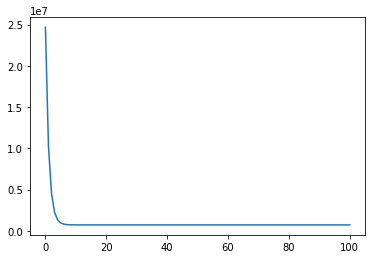

In [9]:
plt.plot(error_l)
plt.show()

In [10]:
print(theta)

[ 3.72798828 80.54363185]


In [11]:
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


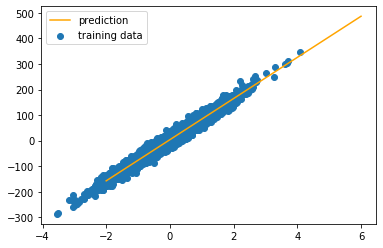

In [12]:
plt.scatter(x,y,label='training data')
plt.plot(xtest,hypothesis(xtest,theta), color='orange', label='prediction')
plt.legend()
plt.show()

In [13]:
prediction_list=hypothesis(xtest,theta)
print(xtest)
print(prediction_list)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]
[-157.35927543  -85.764936    -14.17059657   57.42374285  129.01808228
  200.61242171  272.20676113  343.80110056  415.39543999  486.98977941]


In [14]:
print(np.column_stack((xtest,prediction_list)))

[[-2.00000000e+00 -1.57359275e+02]
 [-1.11111111e+00 -8.57649360e+01]
 [-2.22222222e-01 -1.41705966e+01]
 [ 6.66666667e-01  5.74237429e+01]
 [ 1.55555556e+00  1.29018082e+02]
 [ 2.44444444e+00  2.00612422e+02]
 [ 3.33333333e+00  2.72206761e+02]
 [ 4.22222222e+00  3.43801101e+02]
 [ 5.11111111e+00  4.15395440e+02]
 [ 6.00000000e+00  4.86989779e+02]]
